# Spam eMail Detection using Naive Bayes Classification Algorithm

This is a eMail Spam Classifers that uses Naive Bayes supervised machine learning algorithm. 

**Description:**
In this notebook, I will train the model with a set of emails labelled as either from "Spam" or "Not Spam". There are 702 emails equally divided into spam and non spam category. Next, I shall test the model on 260 emails. Then the model is asked to predict the category of the test emails and compare the accuracy with correct classification that we already know.


**IMPORTANT NOTE:** <br>
The data folders 'train-mails' and 'test-mails' contains all the emails in a  `.txt`  format. The path is set to './train-mails' and './test-mails'. This means you must have your .ipynb file and these folders in the SAME FOLDER in your laptop or Google Drive.

In [1]:
# Installing the scikit-learn library, which includes the Gaussian Naive Bayes algorithm and accuracy metrics
!pip install scikit-learn

## Library Imports

In [1]:
import os # for interacting with the operating system
import numpy as np # for numerical operations
from collections import Counter # to count occurrences of each word

# Importing Gaussian Naive Bayes and accuracy score calculation from scikit-learn
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

## Function: make_Dictionary

This function processes a collection of emails to create a list of the 3000 most common words, excluding non-alphabetical words and single characters, which serves as the feature set for spam email classification.

In [2]:
# Define the function make_Dictionary with a single parameter root_dir.
# This parameter is expected to be a directory path where the email files are stored.

def make_Dictionary(root_dir):
    
    # Initialize a list to store all words from the emails
  all_words = []

    # Create a list of file paths for all emails in the root directory
  emails = [os.path.join(root_dir,f) for f in os.listdir(root_dir)]

    # Loop through each email and extract words
  for mail in emails:
    with open(mail) as m:
      for line in m:
        words = line.split()
        all_words += words
        
    # Count the frequency of each word
  dictionary = Counter(all_words)

    # Create a list to remove unwanted words
  list_to_remove = list(dictionary)

    # Loop through each item and remove unwanted words
  for item in list_to_remove:
    if item.isalpha() == False: # checks if the word contains non-alphabetical characters
      del dictionary[item]
    elif len(item) == 1: # checks if the word is a single character
      del dictionary[item]
    
    # Keep only the 3000 most common words
  dictionary = dictionary.most_common(3000)
  return dictionary


## Function: extract_features

This function reads emails from the specified directory and extracts features for use in a spam classifier. It creates a feature matrix based on the frequency of the most common words (as per the provided dictionary) in each email. It also assigns labels to the emails, marking them as spam or not spam based on their filenames. The feature matrix and the labels are used for training and evaluating the machine learning model.

In [3]:
def extract_features(mail_dir):
    
    # Creating a list of file paths for all the emails in the specified directory
  files = [os.path.join(mail_dir,fi) for fi in os.listdir(mail_dir)]

    # Initializing a feature matrix with dimensions: number of files x 3000 (number of words in the dictionary)
    # Each row represents an email, and each column represents a word's frequency
  features_matrix = np.zeros((len(files),3000))

    # Initializing an array to store labels (spam or not spam) for each email
  train_labels = np.zeros(len(files))

    # Initializing counters
  count = 1;
  docID = 0;
    
    
    # Iterating over each email file
  for fil in files:
    with open(fil) as fi:
        
        # Reading each line in the email file
      for i, line in enumerate(fi):
        if i ==2: # Processing the content from the third line
          words = line.split() # Splitting the line into words
        
            # Iterating over each word in the line
          for word in words:
            wordID = 0
            
              # Searching for the word in the dictionary to find its index
            for i, d in enumerate(dictionary):
                # If word is found in the dictionary, update the feature matrix
              if d[0] == word:
                wordID = i
                features_matrix[docID,wordID] = words.count(word)

                
        # Default label is 0 (not spam)
      train_labels[docID] = 0;
        # Splitting the file path to extract the file name
      filepathTokens = fil.split('/')
        # Extracting the last token which is the file name
      lastToken = filepathTokens[len(filepathTokens)-1]
 
        # If filename starts with "spmsg", it's a spam email, label is set to 1
      if lastToken.startswith("spmsg"):
        train_labels[docID] = 1;
        count = count + 1
        
        # Incrementing docID for the next email
      docID = docID + 1
    
    # Returning the feature matrix and labels for the emails
  return features_matrix, train_labels


## Setting Directory Paths

In [4]:
# Enter the "path" of your "train_mails" and "test-mails" FOLDERS in this cell ...
TRAIN_DIR = './train-mails'
TEST_DIR = './test-mails'

## Feature Extraction

In [5]:
# Creating a dictionary from the training emails
dictionary = make_Dictionary(TRAIN_DIR)

# Extracting features and labels from both training and test datasets
print ("reading and processing emails from TRAIN and TEST folders")
features_matrix, labels = extract_features(TRAIN_DIR)
test_features_matrix, test_labels = extract_features(TEST_DIR)

reading and processing emails from TRAIN and TEST folders


## Model Training and Evaluation

In [6]:
# In this section enter your code to TRAIN the model using Naive Bayes algorithm, then PREDICT and then evaluate PERFORMANCE (Accuracy)

print("reading and processing emails from TRAIN and TEST folders")
print("Training Model using Gaussian Naive Bayes algorithm .....")

# Create a Gaussian Naive Bayes classifier
model = GaussianNB()

# Train the model using the training data
model.fit(features_matrix, labels)
print("Training completed")

print("testing trained model to predict Test Data labels")
# Predict the labels for the test data
predicted_labels = model.predict(test_features_matrix)
print("Completed classification of the Test Data .... now printing Accuracy Score by comparing the Predicted Labels with the Test Labels:")

# Evaluate the performance using accuracy
accuracy = accuracy_score(test_labels, predicted_labels)
print(accuracy)


reading and processing emails from TRAIN and TEST folders
Training Model using Gaussian Naive Bayes algorithm .....
Training completed
testing trained model to predict Test Data labels
Completed classification of the Test Data .... now printing Accuracy Score by comparing the Predicted Labels with the Test Labels:
0.9653846153846154


Detailed classification report:
              precision    recall  f1-score   support

    Not Spam       0.94      0.99      0.97       130
        Spam       0.99      0.94      0.96       130

    accuracy                           0.97       260
   macro avg       0.97      0.97      0.97       260
weighted avg       0.97      0.97      0.97       260



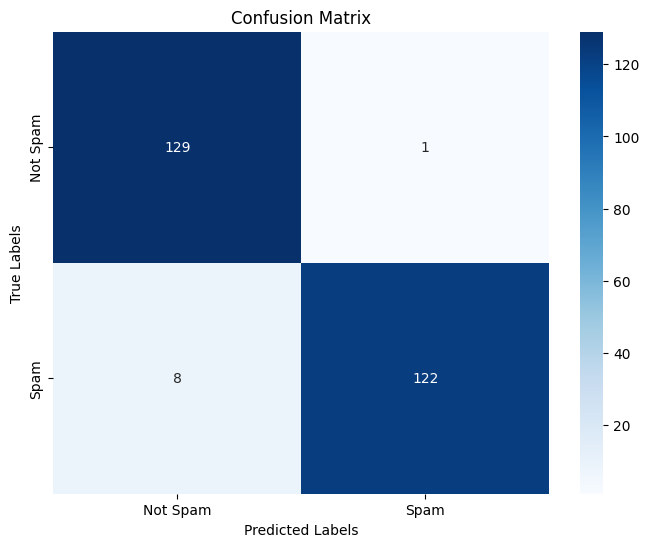

AUC Score: 0.9653846153846154


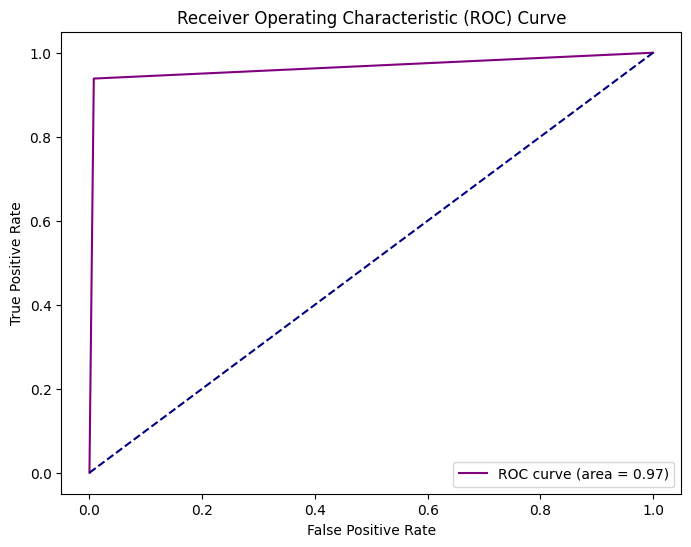

In [20]:
# Other Performance Metrics

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# need the probabilities to calculate AUC for binary classification
predicted_probs = model.predict_proba(test_features_matrix)[:, 1]  # Get the probabilities of the positive class

# Calculate precision, recall, F1-score, and support
print("Detailed classification report:")
print(classification_report(test_labels, predicted_labels, target_names=['Not Spam', 'Spam']))

# Generate the confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# ROC AUC score
auc = roc_auc_score(test_labels, predicted_probs)
print(f"AUC Score: {auc}")

# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(test_labels, predicted_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='purple', label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


======================= END OF PROGRAM =========================